In [1]:
import sys
sys.path.insert(0, '../src')

from zz_minimal_NN import *
import numpy as np
from matplotlib import pyplot as plt
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

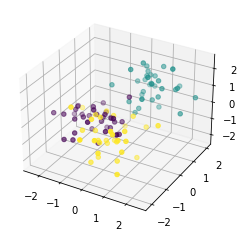

In [2]:
X, y = make_blobs(n_samples=100, n_features=4, centers=((1, 1,1,1), (5, 5,5,5), (3,-1,0,0)), cluster_std = 2)

X = StandardScaler().fit_transform(X)
ax = plt.subplot(projection='3d')
ax.scatter3D( X[:,0], X[:,1], X[:,2], c=y)

N = y.size
# one hot encoding
y_oh = np.zeros((N, 3))
y_oh[np.arange(N), y] = 1

In [3]:
X.shape, y.shape, y_oh.shape, type(X), type(y)

((100, 4), (100,), (100, 3), numpy.ndarray, numpy.ndarray)

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y_oh, test_size=0.30)

In [5]:
y_train.shape, X_train.shape

((70, 3), (70, 4))

In [6]:
model = NN(learning_rate=0.001)

In [7]:
model.add(5, NN.ReLu)

In [8]:
model.add(3, NN.softmax)

In [9]:
model.model(X_train, y_train, verbose=True)

number of samples = 70
training data has 4 features
learning rate = 0.001

hidden layer 0:
nodes in previous layer: 4
nodes in this layer: 5
weight shape: (4, 5)
bias shape: (1, 5)
activation function is <function NN.ReLu at 0x11789a700>

hidden layer 1:
nodes in previous layer: 5
nodes in this layer: 3
weight shape: (5, 3)
bias shape: (1, 3)
activation function is <function NN.softmax at 0x11789a790>


In [10]:
model.fit(epochs=50)

epoch 0. loss: 1.124, accuracy: 0.586
epoch 1. loss: 1.023, accuracy: 0.586
epoch 2. loss: 0.931, accuracy: 0.586
epoch 3. loss: 0.848, accuracy: 0.586
epoch 4. loss: 0.777, accuracy: 0.629
epoch 5. loss: 0.717, accuracy: 0.643
epoch 6. loss: 0.667, accuracy: 0.657
epoch 7. loss: 0.627, accuracy: 0.686
epoch 8. loss: 0.594, accuracy: 0.686
epoch 9. loss: 0.569, accuracy: 0.729
epoch 10. loss: 0.548, accuracy: 0.743
epoch 11. loss: 0.532, accuracy: 0.771
epoch 12. loss: 0.518, accuracy: 0.800
epoch 13. loss: 0.507, accuracy: 0.814
epoch 14. loss: 0.497, accuracy: 0.814
epoch 15. loss: 0.489, accuracy: 0.829
epoch 16. loss: 0.482, accuracy: 0.814
epoch 17. loss: 0.475, accuracy: 0.814
epoch 18. loss: 0.470, accuracy: 0.814
epoch 19. loss: 0.464, accuracy: 0.814
epoch 20. loss: 0.460, accuracy: 0.814
epoch 21. loss: 0.455, accuracy: 0.814
epoch 22. loss: 0.451, accuracy: 0.829
epoch 23. loss: 0.447, accuracy: 0.829
epoch 24. loss: 0.443, accuracy: 0.829
epoch 25. loss: 0.440, accuracy: 0.

In [11]:
model.predict()

array([0, 0, 2, 1, 1, 0, 1, 2, 2, 2, 1, 0, 2, 2, 2, 2, 2, 1, 1, 1, 0, 1,
       0, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 1, 2, 1, 1, 0, 0, 0, 1, 0, 2, 0,
       0, 0, 1, 2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2,
       0, 0, 0, 1])

In [12]:
model.accuracy(y_train)

0.8285714285714286